# Foundations of Cryptography - Part 1


## Basic Substitution Ciphers 

__Terminology__
* Plaintext - The original message in plain English
* Ciphertext - The output of the cipher (i.e., the encrypted message)

Throughout the code examples we'll be using the first few paragraphs of 'Alice in Wonderland' as the plaintext:

In [2]:
plaintext = """
Alice was beginning to get very tired of sitting by her sister
on the bank, and of having nothing to do:  once or twice she had
peeped into the book her sister was reading, but it had no
pictures or conversations in it, `and what is the use of a book,'
thought Alice `without pictures or conversation?'

  So she was considering in her own mind (as well as she could,
for the hot day made her feel very sleepy and stupid), whether
the pleasure of making a daisy-chain would be worth the trouble
of getting up and picking the daisies, when suddenly a White
Rabbit with pink eyes ran close by her.

  There was nothing so VERY remarkable in that; nor did Alice
think it so VERY much out of the way to hear the Rabbit say to
itself, `Oh dear!  Oh dear!  I shall be late!'  (when she thought
it over afterwards, it occurred to her that she ought to have
wondered at this, but at the time it all seemed quite natural);
but when the Rabbit actually TOOK A WATCH OUT OF ITS WAISTCOAT-
POCKET, and looked at it, and then hurried on, Alice started to
her feet, for it flashed across her mind that she had never
before seen a rabbit with either a waistcoat-pocket, or a watch to
take out of it, and burning with curiosity, she ran across the
field after it, and fortunately was just in time to see it pop
down a large rabbit-hole under the hedge.

  In another moment down went Alice after it, never once
considering how in the world she was to get out again.

  The rabbit-hole went straight on like a tunnel for some way,
and then dipped suddenly down, so suddenly that Alice had not a
moment to think about stopping herself before she found herself
falling down a very deep well.

  Either the well was very deep, or she fell very slowly, for she
had plenty of time as she went down to look about her and to
wonder what was going to happen next.  First, she tried to look
down and make out what she was coming to, but it was too dark to
see anything; then she looked at the sides of the well, and
noticed that they were filled with cupboards and book-shelves;
here and there she saw maps and pictures hung upon pegs.  She
took down a jar from one of the shelves as she passed; it was
labelled `ORANGE MARMALADE', but to her great disappointment it
was empty:  she did not like to drop the jar for fear of killing
somebody, so managed to put it into one of the cupboards as she
fell past it.
"""

### Monoalphabetic Subtitution Ciphers (The Caesar Cipher)

One of the oldest and simpliest ciphers is the [Caesar Cipher](https://en.wikipedia.org/wiki/Caesar_cipher), which works by 'rotating' the alphabet by some key. A common version of this cipher is ROT13 or 'Rotation 13' where the alphabet is shifted half way.

<img src="https://upload.wikimedia.org/wikipedia/commons/4/4a/Caesar_cipher_left_shift_of_3.svg" width="300">

For the time being we'll use lowercase for everything, in Python we can express the rotation by adding the position of a plainetext letter in the alphabet to key/rotation value, modulo the length of the alphabet:

In [1]:
from string import ascii_lowercase # Lower case English alphabet

def caesar_encrypt(msg: str, key: int) -> str:
    ciphertext = ''
    for char in msg:
        if char in ascii_lowercase:
            cipher_index = ascii_lowercase.index(char) + key
            ciphertext += ascii_lowercase[cipher_index % len(ascii_lowercase)]
        else:
            ciphertext += char
    return ciphertext

In [3]:
ciphertext = caesar_encrypt(plaintext.lower(), 13) # ROT13
print(ciphertext)


nyvpr jnf ortvaavat gb trg irel gverq bs fvggvat ol ure fvfgre
ba gur onax, naq bs univat abguvat gb qb:  bapr be gjvpr fur unq
crrcrq vagb gur obbx ure fvfgre jnf ernqvat, ohg vg unq ab
cvpgherf be pbairefngvbaf va vg, `naq jung vf gur hfr bs n obbx,'
gubhtug nyvpr `jvgubhg cvpgherf be pbairefngvba?'

  fb fur jnf pbafvqrevat va ure bja zvaq (nf jryy nf fur pbhyq,
sbe gur ubg qnl znqr ure srry irel fyrrcl naq fghcvq), jurgure
gur cyrnfher bs znxvat n qnvfl-punva jbhyq or jbegu gur gebhoyr
bs trggvat hc naq cvpxvat gur qnvfvrf, jura fhqqrayl n juvgr
enoovg jvgu cvax rlrf ena pybfr ol ure.

  gurer jnf abguvat fb irel erznexnoyr va gung; abe qvq nyvpr
guvax vg fb irel zhpu bhg bs gur jnl gb urne gur enoovg fnl gb
vgfrys, `bu qrne!  bu qrne!  v funyy or yngr!'  (jura fur gubhtug
vg bire nsgrejneqf, vg bppheerq gb ure gung fur bhtug gb unir
jbaqrerq ng guvf, ohg ng gur gvzr vg nyy frrzrq dhvgr angheny);
ohg jura gur enoovg npghnyyl gbbx n jngpu bhg bs vgf jnvfgpbng-
cbpxrg, naq ybbxrq ng

#### Example Matplot Bar Chart

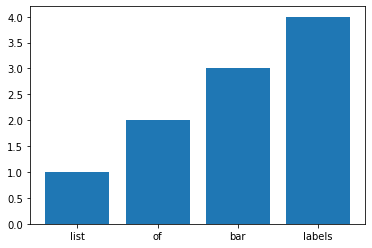

In [4]:
from matplotlib import pyplot
%matplotlib inline  # Allows us to inline graphs

# Example bar char using matplotlib
pyplot.bar(['list', 'of' ,'bar', 'labels'], [1, 2, 3, 4])
pyplot.show()

#### Counting Character Frequencies 

Let's take a look at how frequently certain letters appear in the ciphertext as compared to plaintext English.

In [ ]:
from collections import defaultdict

# The 'long way' to use defaultdict:
#
# def zero() -> int:
#     return 0
#
# char_freqs = defaultdict(zero)

# Create a dict with a default value of 0
# It's much shorter to use a lambda than def
char_freqs = defaultdict(lambda: 0)

for char in ciphertext:
    if char in ascii_lowercase:
        char_freqs[char] += 1  # No need to create key with defaultdict
 

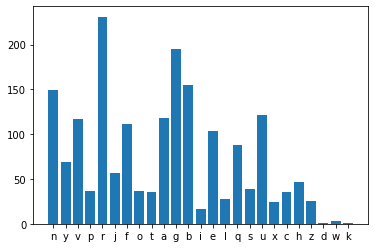

In [ ]:
# Plot the frequency of letters in the ciphertext
cipher_plot1 = pyplot.bar(char_freqs.keys(), char_freqs.values()) 

# Frequency of letters in English:
#  1. E – 11.1607%
#  2. A – 8.4966%
#  3. R – 7.5809%
#  4. I – 7.5448%
#  5. O – 7.1635%
#  6. T – 6.9509%
#  7. N – 6.6544%
#  8. S – 5.7351%

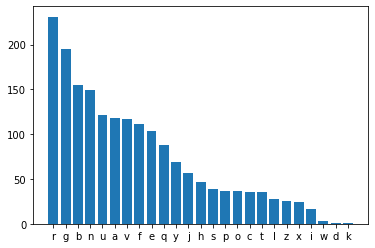

In [ ]:
# Sort bar chart items by value

items = sorted(char_freqs.items(), key=lambda item: item[1], reverse=True)
cipher_plot2 = pyplot.bar([item[0] for item in items], [item[1] for item in items]) 

# 1. E – 11.1607%
# 2. A – 8.4966%
# 3. R – 7.5809%
# 4. I – 7.5448%
# 5. O – 7.1635%
# 6. T – 6.9509%
# 7. N – 6.6544%
# 8. S – 5.7351%

In [ ]:
# So does 'e' = 'r' ?
print(caesar_encrypt('e', 13))

r


#### Digraph Frequencies

We can also look for common two letter combinations (digraphs).

In [ ]:
digraph_freqs = defaultdict(lambda: 0)

for word in ciphertext.split():
    
    # Remove symbols and words too short to contain a digraph
    word = ''.join(char for char in word if char in ascii_lowercase)
    if len(word) < 2:
        continue

    # We want 'foobar' -> fo, oo, ob, ba, ar
    for index, char in enumerate(word[:-1]):
        digraph_freqs[char+word[index+1]] += 1

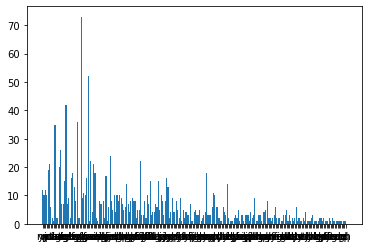

In [ ]:
# Too many values to plot
cipher_plot2 = pyplot.bar(digraph_freqs.keys(), digraph_freqs.values())

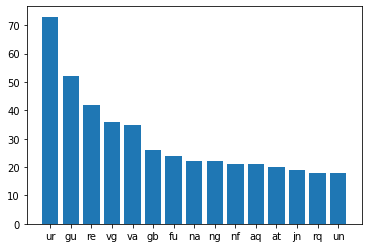

In [ ]:
# Common English Digraphs = th er on an re he in ed nd ha at en es of or nt ea ti to it st io le is ou ar as de rt ve

items = sorted(digraph_freqs.items(), key=lambda item: item[1], reverse=True)

# Only plot the top 15 items
cipher_plot3 = pyplot.bar([item[0] for item in items[:15]], [item[1] for item in items[:15]])

In [ ]:
print(caesar_encrypt('th', 13))
print(caesar_encrypt('er', 13))
print(caesar_encrypt('he', 13))

gu
re
ur


#### Character Frequencies with Different Keys

It's important to note that frequency analysis works _regardless of the key or alphabet used_ in the substitution cipher.

In [ ]:
def char_frequency(ciphertext: str) -> dict:
    ''' Reusable function to plot character frequencies '''
    char_freqs = defaultdict(lambda: 0)
    for char in ciphertext:
        if char in ascii_lowercase:
            char_freqs[char] += 1
    return sorted(char_freqs.items(), key=lambda item: item[1], reverse=True)

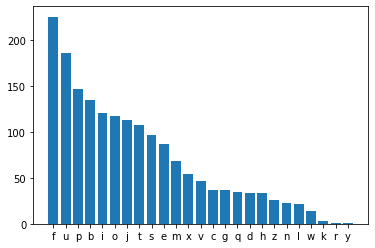

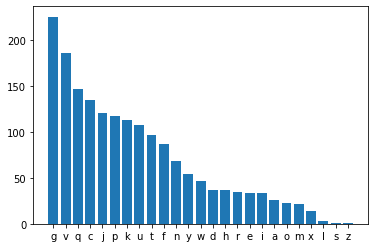

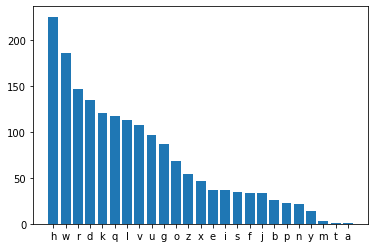

In [ ]:
# Encrypt plaintext using different keys
ciphertexts = [caesar_encrypt(plaintext, key) for key in range(1, 4)]

for index, ciphertext in enumerate(ciphertexts):
    items = char_frequency(ciphertext)
    pyplot.bar([item[0] for item in items], [item[1] for item in items])
    pyplot.show()
    pyplot.close()

In [ ]:
# The symbols are arbitrary

def emoji_encrypt(msg: str, alphabet: dict) -> str:
    ciphertext = ''
    for char in msg:
        if char in alphabet:
            ciphertext += alphabet[char]
        else:
            ciphertext += char
    return ciphertext

# Define cipher alphabet
emojis = ['🐶','🐱','🐭','🐹','🐰','🦊','🐻','🐼','🐻‍❄️','🐨','🐯','🦁','🐮','🐷','🐽','🐸','🐵','🙈','🙉','🙊','🐒','🐔','🐧','🐦','🐤','🐣']
emoji_alphabet = dict(zip(ascii_lowercase, emojis))

emoji_ciphertext = emoji_encrypt(plaintext.lower(), emoji_alphabet)
print(emoji_ciphertext)


🐶🦁🐻‍❄️🐭🐰 🐧🐶🙉 🐱🐰🐻🐻‍❄️🐷🐷🐻‍❄️🐷🐻 🙊🐽 🐻🐰🙊 🐔🐰🙈🐤 🙊🐻‍❄️🙈🐰🐹 🐽🦊 🙉🐻‍❄️🙊🙊🐻‍❄️🐷🐻 🐱🐤 🐼🐰🙈 🙉🐻‍❄️🙉🙊🐰🙈
🐽🐷 🙊🐼🐰 🐱🐶🐷🐯, 🐶🐷🐹 🐽🦊 🐼🐶🐔🐻‍❄️🐷🐻 🐷🐽🙊🐼🐻‍❄️🐷🐻 🙊🐽 🐹🐽:  🐽🐷🐭🐰 🐽🙈 🙊🐧🐻‍❄️🐭🐰 🙉🐼🐰 🐼🐶🐹
🐸🐰🐰🐸🐰🐹 🐻‍❄️🐷🙊🐽 🙊🐼🐰 🐱🐽🐽🐯 🐼🐰🙈 🙉🐻‍❄️🙉🙊🐰🙈 🐧🐶🙉 🙈🐰🐶🐹🐻‍❄️🐷🐻, 🐱🐒🙊 🐻‍❄️🙊 🐼🐶🐹 🐷🐽
🐸🐻‍❄️🐭🙊🐒🙈🐰🙉 🐽🙈 🐭🐽🐷🐔🐰🙈🙉🐶🙊🐻‍❄️🐽🐷🙉 🐻‍❄️🐷 🐻‍❄️🙊, `🐶🐷🐹 🐧🐼🐶🙊 🐻‍❄️🙉 🙊🐼🐰 🐒🙉🐰 🐽🦊 🐶 🐱🐽🐽🐯,'
🙊🐼🐽🐒🐻🐼🙊 🐶🦁🐻‍❄️🐭🐰 `🐧🐻‍❄️🙊🐼🐽🐒🙊 🐸🐻‍❄️🐭🙊🐒🙈🐰🙉 🐽🙈 🐭🐽🐷🐔🐰🙈🙉🐶🙊🐻‍❄️🐽🐷?'

  🙉🐽 🙉🐼🐰 🐧🐶🙉 🐭🐽🐷🙉🐻‍❄️🐹🐰🙈🐻‍❄️🐷🐻 🐻‍❄️🐷 🐼🐰🙈 🐽🐧🐷 🐮🐻‍❄️🐷🐹 (🐶🙉 🐧🐰🦁🦁 🐶🙉 🙉🐼🐰 🐭🐽🐒🦁🐹,
🦊🐽🙈 🙊🐼🐰 🐼🐽🙊 🐹🐶🐤 🐮🐶🐹🐰 🐼🐰🙈 🦊🐰🐰🦁 🐔🐰🙈🐤 🙉🦁🐰🐰🐸🐤 🐶🐷🐹 🙉🙊🐒🐸🐻‍❄️🐹), 🐧🐼🐰🙊🐼🐰🙈
🙊🐼🐰 🐸🦁🐰🐶🙉🐒🙈🐰 🐽🦊 🐮🐶🐯🐻‍❄️🐷🐻 🐶 🐹🐶🐻‍❄️🙉🐤-🐭🐼🐶🐻‍❄️🐷 🐧🐽🐒🦁🐹 🐱🐰 🐧🐽🙈🙊🐼 🙊🐼🐰 🙊🙈🐽🐒🐱🦁🐰
🐽🦊 🐻🐰🙊🙊🐻‍❄️🐷🐻 🐒🐸 🐶🐷🐹 🐸🐻‍❄️🐭🐯🐻‍❄️🐷🐻 🙊🐼🐰 🐹🐶🐻‍❄️🙉🐻‍❄️🐰🙉, 🐧🐼🐰🐷 🙉🐒🐹🐹🐰🐷🦁🐤 🐶 🐧🐼🐻‍❄️🙊🐰
🙈🐶🐱🐱🐻‍❄️🙊 🐧🐻‍❄️🙊🐼 🐸🐻‍❄️🐷🐯 🐰🐤🐰🙉 🙈🐶🐷 🐭🦁🐽🙉🐰 🐱🐤 🐼🐰🙈.

  🙊🐼🐰🙈🐰 🐧🐶🙉 🐷🐽🙊🐼🐻‍❄️🐷🐻 🙉🐽 🐔🐰🙈🐤 🙈🐰🐮🐶🙈🐯🐶🐱🦁🐰 🐻‍❄️🐷 🙊🐼🐶🙊; 🐷🐽🙈 🐹🐻‍❄️🐹 🐶🦁🐻‍❄️🐭🐰
🙊🐼🐻‍❄️🐷🐯 🐻‍❄️🙊 🙉🐽 🐔🐰🙈🐤 🐮🐒🐭🐼 🐽🐒🙊 🐽🦊 🙊🐼🐰 🐧🐶🐤 🙊🐽 🐼🐰🐶🙈 🙊🐼🐰 🙈🐶🐱🐱🐻‍❄️🙊 🙉🐶🐤 🙊🐽
🐻‍❄️🙊🙉🐰🦁🦊, `🐽🐼 🐹🐰🐶🙈!  🐽🐼 🐹🐰🐶🙈!  🐻‍❄️ 🙉🐼🐶🦁🦁 🐱🐰 🦁🐶🙊🐰!'  (🐧🐼🐰🐷 🙉🐼🐰 🙊🐼🐽🐒🐻🐼🙊
🐻‍❄️🙊 🐽🐔🐰🙈 🐶🦊🙊🐰🙈🐧🐶🙈🐹🙉, 🐻‍❄️🙊 🐽🐭🐭🐒🙈🙈🐰🐹 🙊🐽 🐼🐰🙈 🙊🐼🐶🙊 🙉🐼🐰 🐽🐒🐻🐼🙊 🙊🐽 🐼

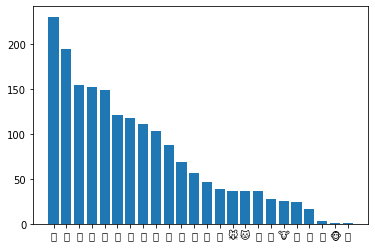

In [ ]:
def alphabet_char_frequency(ciphertext: str, alphabet: str) -> dict:
    ''' Char frequency with caller specified alphabet '''
    char_freqs = defaultdict(lambda: 0)
    for char in ciphertext:
        if char not in alphabet:
            continue
        char_freqs[char] += 1
    return sorted(char_freqs.items(), key=lambda item: item[1], reverse=True)


# Frequency distribution is the same even with an emoji alphabet
items = alphabet_char_frequency(emoji_ciphertext, [*emoji_alphabet.values()])
pyplot.bar([item[0] for item in items], [item[1] for item in items])
pyplot.show()

### Polyalphabetic Subtitution Ciphers (The Vigenère Cipher)

A Vigenère cipher uses multiple alphabets, which are selected based on a password (i.e., the key).

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/9/9a/Vigen%C3%A8re_square_shading.svg/1920px-Vigen%C3%A8re_square_shading.svg.png" width="320">


In [ ]:
# A naive vigenère implementation using a 'vigenère square'

vigenère_square = {}
vigenère_square['a'] = 'abcdefghijklmnopqrstuvwxyz'
vigenère_square['b'] = 'bcdefghijklmnopqrstuvwxyza'
vigenère_square['c'] = 'cdefghijklmnopqrstuvwxyzab'
vigenère_square['d'] = 'defghijklmnopqrstuvwxyzabc'
vigenère_square['e'] = 'efghijklmnopqrstuvwxyzabcd'
vigenère_square['f'] = 'fghijklmnopqrstuvwxyzabcde'
vigenère_square['g'] = 'ghijklmnopqrstuvwxyzabcdef'
vigenère_square['h'] = 'hijklmnopqrstuvwxyzabcdefg'
vigenère_square['i'] = 'ijklmnopqrstuvwxyzabcdefgh'
vigenère_square['j'] = 'jklmnopqrstuvwxyzabcdefghi'
vigenère_square['k'] = 'klmnopqrstuvwxyzabcdefghij'
vigenère_square['l'] = 'lmnopqrstuvwxyzabcdefghijk'
vigenère_square['m'] = 'mnopqrstuvwxyzabcdefghijkl'
vigenère_square['n'] = 'nopqrstuvwxyzabcdefghijklm'
vigenère_square['o'] = 'opqrstuvwxyzabcdefghijklmn'
vigenère_square['p'] = 'pqrstuvwxyzabcdefghijklmno'
vigenère_square['q'] = 'qrstuvwxyzabcdefghijklmnop'
vigenère_square['r'] = 'rstuvwxyzabcdefghijklmnopq'
vigenère_square['s'] = 'stuvwxyzabcdefghijklmnopqr'
vigenère_square['t'] = 'tuvwxyzabcdefghijklmnopqrs'
vigenère_square['u'] = 'uvwxyzabcdefghijklmnopqrst'
vigenère_square['v'] = 'vwxyzabcdefghijklmnopqrstu'
vigenère_square['w'] = 'wxyzabcdefghijklmnopqrstuv'
vigenère_square['x'] = 'xyzabcdefghijklmnopqrstuvw'
vigenère_square['y'] = 'yzabcdefghijklmnopqrstuvwx'
vigenère_square['z'] = 'zabcdefghijklmnopqrstuvwxy'


def naive_vigenère(password: str, plaintext: str) -> str:
    ciphertext = ''
    for index, char in enumerate(plaintext.lower()):

        # Skip non-alphabetic chars
        if char not in ascii_lowercase:
            ciphertext += char
            continue

        # Select the alphabet based on the password char
        alphabet = vigenère_square[password[index % len(password)]]

        # Encrypt using the password-based alphabet
        ciphertext += alphabet[ascii_lowercase.index(char)]

    return ciphertext

example_msg = 'attack at dawn'
ciphertext = naive_vigenère('secret', example_msg)
print(example_msg)
print(ciphertext)

attack at dawn
sxvrgd ev htor


In [ ]:
#
# Modulo Vigenère with a configurable alphabet
#

from itertools import cycle


def vigenère_encrypt(password: str, plaintext: str, alphabet=ascii_lowercase) -> str:
    ''' A Vigenère encryption routine that doesn't rely on a pre-built square '''
    ciphertext = ''
    for char, key in zip(plaintext, cycle(password)):      # Iterate thru plaintext and key
        if char not in alphabet:                           # Skip any values not in the alphabet
            ciphertext += char
            continue
        index = alphabet.index(char) + alphabet.index(key) # Index of the plaintext + index of the key
        ciphertext += alphabet[index % len(alphabet)]      # Modulo the length of the alphabet
    return ciphertext


def vigenère_decrypt(password: str, ciphertext: str, alphabet=ascii_lowercase) -> str:
    plaintext = ''
    for char, key in zip(ciphertext, cycle(password)):     # Iterate thru plaintext and key
        if char not in alphabet:
            plaintext += char
            continue
        index = alphabet.index(char) - alphabet.index(key) # Subtract the index of the key from ciphertext index
        plaintext += alphabet[index]                       # Negative indexes work perfectly (no need for modulo)
    return plaintext


In [ ]:
# Example encrypt/decrypt using a password
foo = vigenère_encrypt('secret', 'attack at dawn')
print(foo)
bar = vigenère_decrypt('secret', foo)
print(bar)

sxvrgd ev htor
attack at dawn


In [ ]:
# Encrypt the full plaintext sample
vigenère_ciphertext = vigenère_encrypt('hunter', plaintext.lower())
print(vigenère_ciphertext)


uybgv qnl slavgrzua ms nyg zvys mmilx hj zcgmmen or yll lmjaye
se nux shhx, rux hj ouibrx hbmlzua ms ki:  fuwr si njbgv mux yhx
iivwyq meai mlv vbho oye wzznrk nhm kirkcaz, iog mk bnw ev
cbgkblrl fy phrmllftxzvhf me cg, `hhq ayhn bw abr yjl by r vbho,'
gaslnbg ecpwr `npnuhyk jvvxlyyf si wbgzvymnmmfu?'

  mb wyl jtw jialmullvgk ph aii ijg dphq (rz jxpc uf wyl phyck,
ysi nux yvn wep gnwi oye jvlf oiif feivws tru mgntzk), aylnuxv
abr tclufnvv is qrrcaz r xnbwp-wutme qbnpu vr afynu xyl gkslifr
sw armxzua nt hhq tzjevgk abr hrpmvxw, quxr zoqwiess t nocgx
ihvobx dcga gphx iplm kee wyhwv vl lvy.

  abrki duf rfabvgk zi oiif exqryenupv ca xyhn; rfy qbh hfvvi
abvgo pn ls cyer dbwu sla by koy pep nb lvhl mlv lnufza ftc ai
bxjlfs, `vb wiry!  sy xrtv!  v wyhfy fv fnmi!'  (aylh llv nuhyxon
bx vprk rmnrkaryxf, za bvglylrw kv uxv abnm joy hyxon ms ouix
nvhqxvvk nm kocf, sbn tx abr xzty bx hfy wvlgrw hbcgx ehnhkec);
uyk quxr abr vrivvm rjnhtpcf ghsb u pekjb hyk is mkz jtmjawbtx-
jbvova, tru fbhovk nm

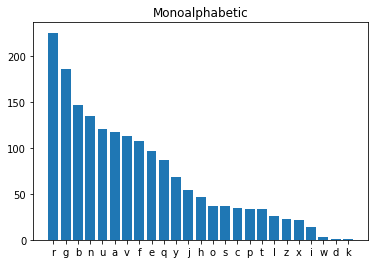

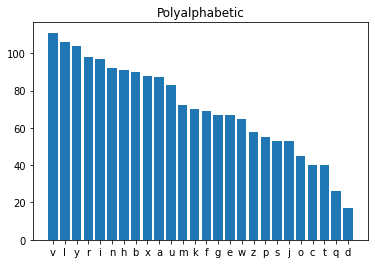

In [ ]:
# Monoalphabetic Frequency
items = char_frequency(caesar_encrypt(plaintext, 13))
pyplot.bar([item[0] for item in items], [item[1] for item in items])
pyplot.title('Monoalphabetic')
pyplot.show()
pyplot.close()

# Polyalphabetic Frequency
items = char_frequency(vigenère_ciphertext)
pyplot.bar([item[0] for item in items], [item[1] for item in items])
pyplot.title('Polyalphabetic')
pyplot.show()

In [ ]:
# Encrypt using 'printable' alphabet, including whitespace
from string import printable

vigenère_ciphertext2 = vigenère_encrypt('hunter', plaintext, alphabet=printable)
print(vigenère_ciphertext2)

d%ILqFb!xV8CvKFQBJEKhWClxIQnJFI#hWwSvHhRtlJMQWwOxoy"8IvVhVwTKIOpCObXEH8CrRH28BEHhRtlyESLBHbRLWvJEKhWCluS0n8PEGBnCSbXTLqFbWEH8IrHjSsFGIAnwOKShWvFbFLRylyIOnGJJXBU8XrWhUsBuMKJ^lsYQnwUbLxG8OFqMLqULVBV8PIozRBWvVPDHJFRPnwObMQ28grRAnKIrXhLGlKLBnITvoLI8BbFLRy0\qQKCVxLQnOMzGBn3XzXERIUbTFFHVIIPnCSbGLQJFIWxWwPEc|palb[LnGIvoTDGltSKVwEvVFQulzRhKsSbSTQ8NzRAn@BJoTHzMbEPnGIvozRIMu3jICSbXEH8IFXhGoZbQxGslyIOntFvPhYsSPoPOsFG#hDBEbWQXDJu0
nKIvXEHFnKLBnDMvEPXFFbSCnABBMKJ8BbHxLGZ|GEDwOb!LXzEbFBnKPIXEnHIvoQUCVsPBpCGbKBWHJEKhXDlrRAnDJtOFQulKLBnrBzWFHG0b!EHBlJYAGsOC#hD8\yMQHa=rFyLHlNMQK8QzRHnsZvWhUoObGIRGFbFVnvFI5jp8l+LBUslNEPnBPKLFQulJSh]S=:oOHABIOxEzFbMKnHIrX1nBPIoALrlRPFFsnKLFQylzXhVCl-)/`8NLGEnCVKoLI8UyIhZoZbXLnvFrVhWvFb@xEpJKoPDMlKSjLHTvPC28g&LhGsBI}hn#IbHBDF`bo&nGIrPInpFbPxWs`\ohKIvRhVvFbXERIHyXjLHlFZBU8BwXBUKBIHP28JKoLFqVIVBG8UFoEHFlKLxW8TyIhRIHyXhWClyESHaXFRAHFFuoxW8UyMP28CLXhDHlKLBnHJDIhLHlrPInGFvQBG8RLMQH8OrXRUoM^8jEIUb!EHBlKLBn&BsFFW8BtXRDzMPo;<#,b%h^O?T,h<)?b=#nW?*o>$W>+',$(1d>,&Y&+3hDBEbPLRyFuoxW

In [ ]:
# Decrypt using printable alphabet, including whitespace

vigenère_decrypt('hunter', vigenère_ciphertext2, alphabet=printable)

"\nAlice was beginning to get very tired of sitting by her sister\non the bank, and of having nothing to do:  once or twice she had\npeeped into the book her sister was reading, but it had no\npictures or conversations in it, `and what is the use of a book,'\nthought Alice `without pictures or conversation?'\n\n  So she was considering in her own mind (as well as she could,\nfor the hot day made her feel very sleepy and stupid), whether\nthe pleasure of making a daisy-chain would be worth the trouble\nof getting up and picking the daisies, when suddenly a White\nRabbit with pink eyes ran close by her.\n\n  There was nothing so VERY remarkable in that; nor did Alice\nthink it so VERY much out of the way to hear the Rabbit say to\nitself, `Oh dear!  Oh dear!  I shall be late!'  (when she thought\nit over afterwards, it occurred to her that she ought to have\nwondered at this, but at the time it all seemed quite natural);\nbut when the Rabbit actually TOOK A WATCH OUT OF ITS WAISTCOAT-\nP

#### Breaking the Vigenère Cipher

In [ ]:
# Longest Repeated Substring Problem - https://en.wikipedia.org/wiki/Longest_repeated_substring_problem
# We're using a naive bruteforce solution, but better space/time efficent solutions do exist

def substrings(start: int, value: str) -> str:
    ''' Generate substring permuations '''
    substr = value[start:]
    index = -1
    while 1 < len(substr):
        yield substr
        substr = value[start:index]
        index -= 1


def substring_frequencies(text: str, alphabet=ascii_lowercase) -> dict:
    ''' Find all repeated substrings with length greater than 1 '''
    substr_freqs = defaultdict(lambda: 0)
    for word in text.split():
        
        # Remove non-alphabetic chars and skip short 'words'
        word = ''.join(char for char in word if char in alphabet)
        if len(word) <= 1:
            continue
        
        # Slice the string into substrings and count
        for index in range(len(word)):
            for substr in substrings(index, word):
                substr_freqs[substr] += 1
                
    # Filter substrings that only occur once
    return dict(item for item in substr_freqs.items() if item[1] > 1)


def longest_repeating_substrings(text: str, alphabet=ascii_lowercase) -> list:
    ''' Calculate substring frequencies and return the longest repeating substring '''
    substr_freqs = substring_frequencies(text, alphabet)                                         # Get substring frequencies
    longest_key = max(len(key) for key in substr_freqs.keys())                                   # Find longest dict key
    longest_substrs = dict(item for item in substr_freqs.items() if len(item[0]) == longest_key) # Filter items with dict key length less than longest key
    most_repeats = max([*longest_substrs.values()])                                              # Find greatest dict item value (number of repeats)
    return [key for key, value in longest_substrs.items() if value == most_repeats]              # Return all strings with greatest value

# Example longest repeated substring 'abra'
longest_repeating_substrings('abracadabra')

['abra']

In [ ]:
longest_repeating_substrings(vigenère_ciphertext)

['mhwhvufl']

In [ ]:
for lrs in longest_repeating_substrings(vigenère_ciphertext):
    first = vigenère_ciphertext.index(lrs)                    # Index where first occurance of 'lrs' *begins*
    offset = first + len(lrs)                                 # Slice after 'lrs' so we can use .index() again
    second = vigenère_ciphertext[offset:].index(lrs) + offset # Find index of second 'lrs' and add offset to get original position

    print("Key length is a factor of %d" % (second - first))  # Account for length of 'lrs' in offset

Key length is a factor of 18


In [ ]:
def substr_delta(text: str, substr: str) -> int:
    ''' Find distance between substr occurances '''
    first = text.index(substr)
    offset = first + len(substr)
    second = text[offset:].index(substr) + offset
    return second - first

def repeating_substrings(substr_freqs: dict, length: int) -> list:
    ''' Repeatings substrings of a specified length '''
    return [item[0] for item in substr_freqs.items() if len(item[0]) == length]

def all_substr_deltas(text: str, min_length=4) -> list:
    ''' Find all deltas between repeating substrs '''
    substr_freqs = substring_frequencies(text)
    longest_key = max(len(key) for key in substr_freqs.keys())
    factors = []
    for length in range(longest_key, min_length, -1):
        for substr in repeating_substrings(substr_freqs, length):
            factors.append(substr_delta(text, substr))
    return factors

# Find all common factors of deltas
def find_vigenère_key_length(text: str) -> None:
    ''' Automatically find the length of the Vigenère key '''
    factors = []
    deltas = all_substr_deltas(text)
    for n in range(2, min(deltas)):
        if all(factor % n == 0 for factor in deltas):
            factors.append(n)
    print("Most likely key length is %d" % factors[-1])

find_vigenère_key_length(vigenère_ciphertext)

Most likely key length is 6


In [ ]:
for key in ['asdf', 'asdfg', 'asdffghj']:
    encrypted = vigenère_encrypt(key, plaintext.lower())
    print('Key = %s (%d)' % (key, len(key)))
    find_vigenère_key_length(encrypted)

Key = asdf (4)
Most likely key length is 4
Key = asdfg (5)
Most likely key length is 5
Key = asdffghj (8)
Most likely key length is 8
